In [1]:
#!pip install klib dtale joblib pandas_profiling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_train = pd.read_csv('Train.csv')
df_test = pd.read_csv('Test.csv')

In [4]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
%config IPCompleter.greedy=True

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
df_train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [11]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean(),inplace=True) # as it is numerical column we impute it using mean

In [12]:
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(),inplace=True)

In [13]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
df_train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True) #it is categorical column so we will impute it using mode

In [16]:
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0],inplace=True) #it is categorical column so we will impute it using mode

In [17]:
df_test.isnull().sum() #now there is no null values

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [18]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
#select features
df_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
df_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [20]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
df_test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,reg,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


# EDA

In [22]:
import dtale

c:\users\hp\miniconda3\lib\site-packages\dtale\dash_application\charts.py:13: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
c:\users\hp\miniconda3\lib\site-packages\dtale\dash_application\charts.py:14: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [23]:
dtale.show(df_train)

In [24]:
from pandas_profiling import ProfileReport


In [25]:
profile = ProfileReport(df_train,title="Report")

In [26]:
profile

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
profile.to_file(output_file="Pandas profiling report on Big mart sales data.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

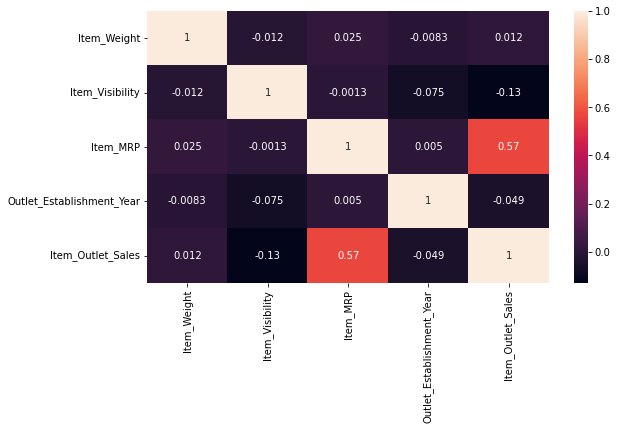

In [28]:
%matplotlib inline
plt.figure(figsize=(9,5))
sns.heatmap(df_train.corr(),annot=True)

In [29]:
import klib as k

GridSpec(6, 5)

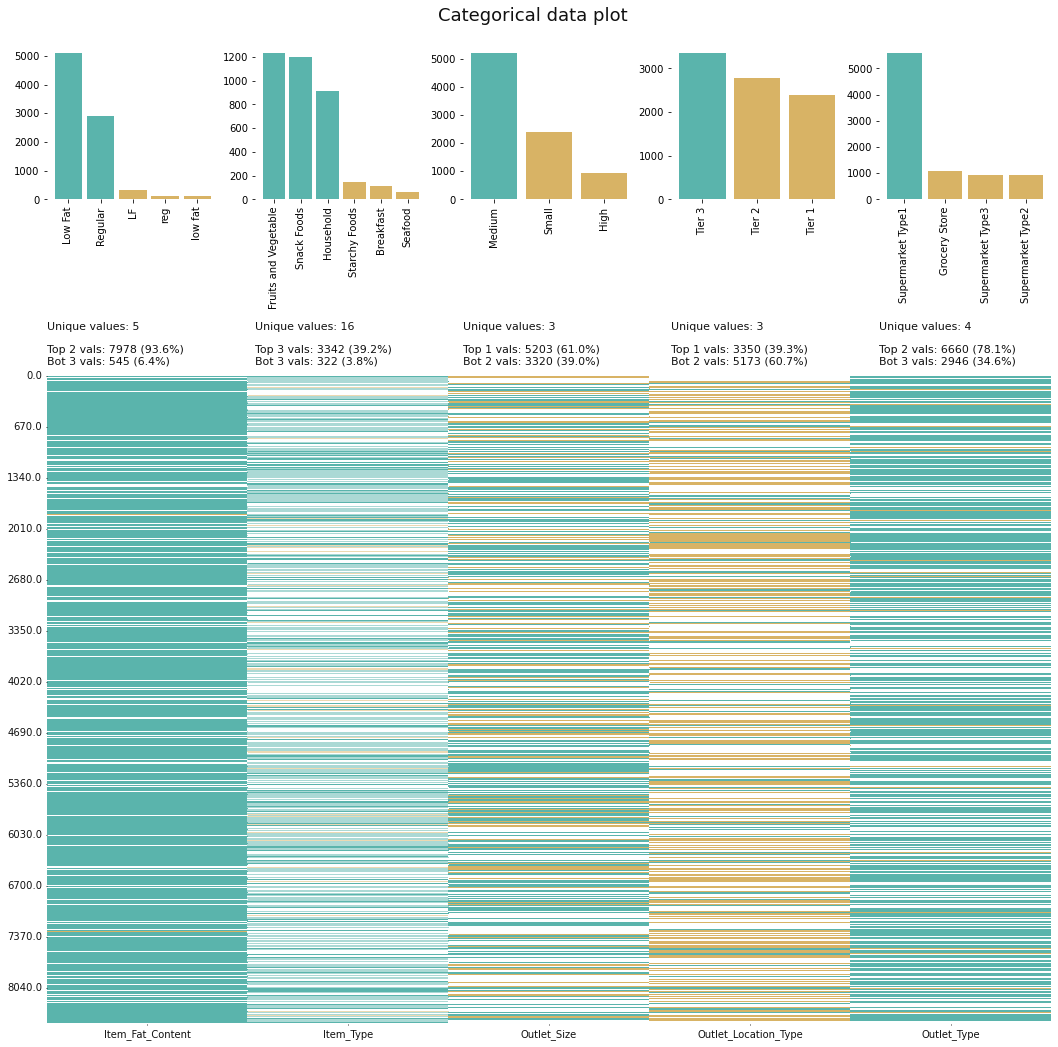

In [30]:
k.cat_plot(df_train)

In [31]:
k.corr_mat(df_train)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.01,0.02,-0.01,0.01
Item_Visibility,-0.01,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,-0.01,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,0.01,-0.13,0.57,-0.05,1.00


In [32]:
k.missingval_plot(df_train)

No missing values found in the dataset.


In [33]:
k.data_cleaning(df_train)

Shape of cleaned data: (8523, 10)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.43 MB (-66.15%)



,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.3,Low Fat,0.016047,Dairy,249.809204,1999,Medium,Tier 1,Supermarket Type1,3735.137939
1,5.92,Regular,0.019278,Soft Drinks,48.269199,2009,Medium,Tier 3,Supermarket Type2,443.422791
2,17.5,Low Fat,0.01676,Meat,141.617996,1999,Medium,Tier 1,Supermarket Type1,2097.27002
3,19.200001,Regular,0.0,Fruits and Vegetables,182.095001,1998,Medium,Tier 3,Grocery Store,732.380005
4,8.93,Low Fat,0.0,Household,53.861401,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.521805,1987,High,Tier 3,Supermarket Type1,2778.383301
8519,8.38,Regular,0.046982,Baking Goods,108.156998,2002,Medium,Tier 2,Supermarket Type1,549.284973
8520,10.6,Low Fat,0.035186,Health and Hygiene,85.122398,2004,Small,Tier 2,Supermarket Type1,1193.113647
8521,7.21,Regular,0.145221,Snack Foods,103.133202,2009,Medium,Tier 3,Supermarket Type2,1845.597656


In [34]:
k.clean_column_names(df_train)

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                8523 non-null   float64
 1   item_fat_content           8523 non-null   object 
 2   item_visibility            8523 non-null   float64
 3   item_type                  8523 non-null   object 
 4   item_mrp                   8523 non-null   float64
 5   outlet_establishment_year  8523 non-null   int64  
 6   outlet_size                8523 non-null   object 
 7   outlet_location_type       8523 non-null   object 
 8   outlet_type                8523 non-null   object 
 9   item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [36]:
df_train = k.convert_datatypes(df_train) #converts existing datatypes to more efficient dtypes

In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   item_weight                8523 non-null   Float32 
 1   item_fat_content           8523 non-null   category
 2   item_visibility            8523 non-null   Float32 
 3   item_type                  8523 non-null   category
 4   item_mrp                   8523 non-null   Float32 
 5   outlet_establishment_year  8523 non-null   int16   
 6   outlet_size                8523 non-null   category
 7   outlet_location_type       8523 non-null   category
 8   outlet_type                8523 non-null   category
 9   item_outlet_sales          8523 non-null   Float32 
dtypes: Float32(4), category(5), int16(1)
memory usage: 226.2 KB


# Data preprocessing


In [38]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [40]:
df_train = df_train.apply(le.fit_transform)

In [41]:
df_train.head(10)

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type,item_outlet_sales
0,284,1,664,4,5592,4,1,0,1,2540
1,57,2,880,14,473,8,1,2,2,422
2,376,1,715,10,2901,4,1,0,1,1639
3,393,2,0,6,4227,3,1,2,0,670
4,265,1,0,9,627,1,0,2,1,865
5,297,2,0,0,563,8,1,2,2,523
6,334,2,395,13,744,1,0,2,1,332
7,326,1,6770,13,2009,0,1,2,3,2658
8,363,2,707,5,1638,5,1,1,1,930
9,393,2,5780,5,4420,7,1,1,1,2911


# Splitting our data into train and test

In [46]:
x=df_train.drop('item_outlet_sales',axis=1)
y=df_train['item_outlet_sales']

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [48]:
x_train

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
549,288,2,2304,6,3854,4,1,0,1
7757,381,1,3318,9,3829,5,1,1,1
764,377,2,4977,10,2152,2,2,0,1
6867,229,1,1823,6,261,5,1,1,1
2716,325,1,6993,13,3391,2,2,0,1
...,...,...,...,...,...,...,...,...,...
5734,286,2,7850,6,2840,3,1,2,0
5191,357,1,6492,5,1015,7,1,1,1
5390,377,1,856,8,5369,5,1,1,1
860,405,3,3739,13,2364,7,1,1,1


In [49]:
x_test

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
7503,340,1,1509,5,1114,1,0,2,1
2957,204,1,4691,8,292,2,2,0,1
7031,342,2,2809,3,275,4,1,0,1
1084,326,2,3098,14,3933,0,1,2,3
856,295,2,361,10,4747,6,2,1,1
...,...,...,...,...,...,...,...,...,...
7205,314,2,5743,13,2683,2,2,0,1
3257,137,1,0,6,3137,8,1,2,2
6346,342,2,2797,3,275,1,0,2,1
6318,291,2,7082,0,533,8,1,2,2


In [51]:
y_train

549     1814
7757    2230
764      964
6867     278
2716    2732
        ... 
5734     274
5191    1099
5390    3270
860     1337
7270     841
Name: item_outlet_sales, Length: 6818, dtype: int32

In [52]:
y_test

7503    1398
2957     343
7031     363
1084    3199
856     1796
        ... 
7205    2179
3257     792
6346     585
6318     247
6339     851
Name: item_outlet_sales, Length: 1705, dtype: int32

In [53]:
x.describe() #you can see mean is very big for all columns so we need to normalize it

,item_weight,item_fat_content,item_visibility,item_type,item_mrp,outlet_establishment_year,outlet_size,outlet_location_type,outlet_type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,298.756776,1.369354,3708.866127,7.226681,2941.096562,3.790684,1.170832,1.112871,1.201220
std,95.451067,0.644810,2396.221439,4.209990,1675.483234,2.730322,0.600327,0.812757,0.796459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,285.000000,1.000000,1595.500000,4.000000,1535.500000,1.000000,1.000000,0.000000,1.000000
50%,326.000000,1.000000,3708.000000,6.000000,2949.000000,4.000000,1.000000,1.000000,1.000000
75%,361.000000,2.000000,5788.500000,10.000000,4351.500000,6.000000,2.000000,2.000000,1.000000
max,415.000000,4.000000,7878.000000,15.000000,5937.000000,8.000000,2.000000,2.000000,3.000000


# Standardization

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [55]:
x_train_std = sc.fit_transform(x_train)

In [56]:
x_train_std

array([[-0.11982805,  0.97369917, -0.5870773 , ..., -0.28419801,
        -1.38348228, -0.25948864],
       [ 0.85918019, -0.57161762, -0.16399382, ..., -0.28419801,
        -0.14965858, -0.25948864],
       [ 0.81707231,  0.97369917,  0.52821079, ...,  1.38332526,
        -1.38348228, -0.25948864],
       ...,
       [ 0.81707231, -0.57161762, -1.19124383, ..., -0.28419801,
        -0.14965858, -0.25948864],
       [ 1.11182747,  2.51901595,  0.01166509, ..., -0.28419801,
        -0.14965858, -0.25948864],
       [ 0.69074866, -2.1169344 , -1.24256461, ...,  1.38332526,
        -1.38348228, -0.25948864]])

In [57]:
x_test_std = sc.fit_transform(x_test)

In [59]:
x_test_std

array([[ 0.45012434, -0.57791931, -0.91541719, ..., -1.94535345,
         1.12203842, -0.22494293],
       [-0.94920843, -0.57791931,  0.41394838, ...,  1.37313343,
        -1.31500044, -0.22494293],
       [ 0.47070276,  0.9961261 , -0.37230743, ..., -0.28611001,
        -1.31500044, -0.22494293],
       ...,
       [ 0.47070276,  0.9961261 , -0.37732075, ..., -1.94535345,
         1.12203842, -0.22494293],
       [-0.05404703,  0.9961261 ,  1.41285255, ..., -0.28611001,
         1.12203842,  1.05348271],
       [-0.95949764, -0.57791931,  0.04505152, ..., -0.28611001,
        -0.09648101, -0.22494293]])

# Model Building

In [60]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [61]:
lr.fit(x_train_std,y_train)

LinearRegression()

In [62]:
y_pred=lr.predict(x_test_std)

In [63]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [64]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.5600903049100961
480.45489315623473
601.6713446975714


In [65]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [66]:
rf.fit(x_train_std,y_train)

RandomForestRegressor(n_estimators=1000)

In [67]:
y_pred_rf= rf.predict(x_test_std)

In [68]:
print(r2_score(y_test,y_pred_rf))
print(mean_absolute_error(y_test,y_pred_rf))
print(np.sqrt(mean_squared_error(y_test,y_pred_rf)))

0.647849465013375
405.0956739002933
538.3215152635632


# Hyper-parameter tuning

In [71]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators,max_depth=max_depth,min_samples_leaf=min_samples_leaf
            ,max_features=max_features,min_samples_split=min_samples_split)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(x_train_std, y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 135000 candidates, totalling 270000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 4885 tasks      | elapsed: 11.9min
[Parallel(n_jobs=-1)]: Done 5816 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 6829 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 7922 tasks      | elapsed: 17.2min


Executing shutdown due to inactivity...


2021-09-26 11:45:19,511 - INFO     - Executing shutdown due to inactivity...


Executing shutdown...


2021-09-26 11:45:24,881 - INFO     - Executing shutdown...
[Parallel(n_jobs=-1)]: Done 9097 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 10352 tasks      | elapsed: 23.2min
[Parallel(n_jobs=-1)]: Done 11689 tasks      | elapsed: 24.7min
[Parallel(n_jobs=-1)]: Done 13106 tasks      | elapsed: 28.8min


KeyboardInterrupt: 

In [ ]:
grid_search_forest.best_params_


In [ ]:
grid_search_forest.best_score_

In [ ]:
y_pred_rf_grid=grid_search_forest.predict(x_test_std)

In [ ]:
r2_score(y_test,y_pred_rf_grid)

# Save your model

In [72]:
import joblib

In [73]:
joblib.dump(grid_search_forest,r'E:\Big mart sales prediction project\model\model.sav')

['E:\\Big mart sales prediction project\\model\\model.sav']